# Wordle Reinforcement Experiments

## Imports and Config

In [1]:
import sys
sys.path.append('../..')

In [13]:
import src.config as src_config
from src.models import qlearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Config Changes

In [4]:
epsilon = 0.8 #For epsilon greedy learning
gamma = 0.6 #Discount factor
alpha = 0.5 #Learning rate
trials = 1000

In [5]:
# Rewards

config.WIN_REWARD = 30
config.LOSE_REWARD = -10
config.GREEN_REWARD = 5
config.YELLOW_REWARD = 3
config.GREY_REWARD = -1

## Q - Learning

In [6]:
config = {'epsilon': epsilon, 'gamma': gamma, 'alpha': alpha}
qmodel = qlearn.QLearn(config)

In [7]:
qmodel.train(trials)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [18:19<00:00,  1.10s/it]


Text(0.5, 1.0, 'Games solved: 165/1000')

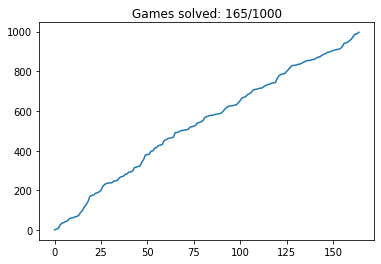

In [8]:
games_solved = qmodel.games_solved
plt.plot(list(range(len(games_solved))), games_solved)
plt.title(f'Games solved: {len(games_solved)}/{trials}')

In [16]:
q_table = qmodel.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src_config.WORD_LENGTH):
    for yellow in range(src_config.WORD_LENGTH-green):
        for state in range(src_config.GAME_LENGTH):
            action = qmodel.strategies[q_actions[green, yellow, state]].__class__.__name__[:-8]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 4)


Action                                  \
Game State                   0               1               2   
# Green # Yellow                                                 
0       0         FreshLetters  HighestLLSmart  HighestLLSmart   
        1               Random  HighestLLSmart  HighestLLSmart   
        2               Random  HighestLLSmart  HighestLLSmart   
        3               Random  HighestLLSmart       HighestLL   
        4               Random          Random  HighestLLSmart   
1       0               Random    FreshLetters  HighestLLSmart   
        1               Random  HighestLLSmart  HighestLLSmart   
        2               Random  HighestLLSmart  HighestLLSmart   
        3               Random       HighestLL  HighestLLSmart   
2       0               Random       HighestLL  HighestLLSmart   
        1               Random       HighestLL  HighestLLSmart   
        2               Random          Random  HighestLLSmart   
3       0               Random  HighestLLSmart  HighestLLSmart   
        1               Random       HighestLL          Random   
4       0               Random       HighestLL       HighestLL   

                                                                  
Game State                     3               4               5  
# Green # Yellow                                                  
0       0           FreshLetters          Random       HighestLL  
        1           FreshLetters  HighestLLSmart          Random  
        2         HighestLLSmart  HighestLLSmart    FreshLetters  
        3                 Random    FreshLetters    FreshLetters  
        4         HighestLLSmart  HighestLLSmart  HighestLLSmart  
1       0           FreshLetters  HighestLLSmart       HighestLL  
        1         HighestLLSmart    FreshLetters    FreshLetters  
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart  
2       0         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart  
3       0         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart  
4       0         HighestLLSmart  HighestLLSmart  HighestLLSmart

In [17]:
qmodel.test()

++++++++++++++++++++++++++++++
G W I N E 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
G W I N E 
S I R E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
G W I N E 
S I R E S 
S I N E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
G W I N E 
S I R E S 
S I N E S 
O U T T A 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
G W I N E 
S I R E S 
S I N E S 
O U T T A 
H Y P H Y 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
G W I N E 
S I R E S 
S I N E S 
O U T T A 
H Y P H Y 
H Y P H Y 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

{'solved': False}
